In [1]:
import pandas as pd
import numpy as np
import random as rnd
from scipy.io.arff import loadarff

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 5)

from sklearn.ensemble import BaggingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, confusion_matrix, f1_score

# model evaluation calculate and score
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score,  mean_squared_error

# plot metrics model answer(metrics)
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

# model evaluation 
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import LabelBinarizer


from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
#import umap

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm

# import some dependencies to plot

from plotly.offline import iplot
# init_notebook_mode(connected=True)
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split, KFold, cross_val_score

# machine learning model
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
# boosting
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.feature_selection import SelectFromModel

# Import for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [17]:
raw_data = loadarff('data/cleaned/pc3.arff')
df_data = pd.DataFrame(raw_data[0])
df_data

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
0,14.0,11.0,4.0,3.0,0.0,20.0,6.0,0.23,10.0,2.0,...,22.0,0.15,51.0,59.0,27.0,15.0,41.0,11.54,26.0,b'N'
1,6.0,3.0,1.0,1.0,3.0,4.0,2.0,0.50,2.0,2.0,...,5.0,0.14,4.0,7.0,4.0,6.0,14.0,57.14,4.0,b'N'
2,14.0,19.0,6.0,5.0,12.0,24.0,11.0,0.28,10.0,2.4,...,28.0,0.17,63.0,89.0,33.0,25.0,66.0,33.33,39.0,b'N'
3,20.0,17.0,2.0,3.0,12.0,20.0,10.0,0.26,8.0,2.5,...,23.0,0.14,47.0,60.0,28.0,23.0,72.0,29.41,39.0,b'N'
4,6.0,3.0,6.0,1.0,0.0,4.0,2.0,0.18,2.0,2.0,...,10.0,0.11,23.0,25.0,15.0,9.0,18.0,9.09,11.0,b'Y'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1094,1.0,3.0,0.0,0.0,0.0,4.0,2.0,0.10,2.0,2.0,...,7.0,0.09,121.0,122.0,22.0,8.0,22.0,0.00,20.0,b'N'
1095,1.0,3.0,0.0,0.0,0.0,4.0,2.0,0.25,2.0,2.0,...,7.0,0.20,23.0,24.0,8.0,8.0,10.0,0.00,8.0,b'N'
1096,0.0,3.0,0.0,0.0,0.0,4.0,2.0,0.25,2.0,2.0,...,7.0,0.22,23.0,24.0,8.0,8.0,9.0,0.00,8.0,b'N'
1097,0.0,3.0,0.0,0.0,0.0,4.0,2.0,0.29,2.0,2.0,...,7.0,0.25,17.0,18.0,6.0,8.0,8.0,0.00,7.0,b'N'


In [3]:
df_data.info() #informs about the data (memory usage, data types etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   LOC_BLANK                        1099 non-null   float64
 1   BRANCH_COUNT                     1099 non-null   float64
 2   CALL_PAIRS                       1099 non-null   float64
 3   LOC_CODE_AND_COMMENT             1099 non-null   float64
 4   LOC_COMMENTS                     1099 non-null   float64
 5   CONDITION_COUNT                  1099 non-null   float64
 6   CYCLOMATIC_COMPLEXITY            1099 non-null   float64
 7   CYCLOMATIC_DENSITY               1099 non-null   float64
 8   DECISION_COUNT                   1099 non-null   float64
 9   DECISION_DENSITY                 1099 non-null   float64
 10  DESIGN_COMPLEXITY                1099 non-null   float64
 11  DESIGN_DENSITY                   1099 non-null   float64
 12  EDGE_COUNT          

In [4]:
df_data.describe() #shows simple statistics (min, max, mean, etc.)

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
count,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,...,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000
mean,8.133758,12.330300,2.866242,1.706096,5.582348,20.145587,6.850773,0.274813,9.393995,2.173549,...,10.161965,22.384895,0.194422,71.347589,87.817106,27.371247,15.095541,44.748863,15.883194,29.515924
std,10.177896,23.500593,3.125973,3.541077,10.332685,44.146724,12.037340,0.130341,21.381273,0.364159,...,22.203299,40.047583,0.114276,180.614694,222.931647,43.945700,6.320880,59.019159,18.856796,47.644789
min,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.010000,2.000000,2.000000,...,2.000000,2.000000,0.010000,2.000000,5.000000,2.000000,4.000000,4.000000,0.000000,3.000000
25%,1.000000,5.000000,1.000000,0.000000,0.000000,6.000000,3.000000,0.180000,2.000000,2.000000,...,3.000000,9.000000,0.100000,18.000000,24.000000,10.000000,11.000000,14.000000,0.000000,10.000000
50%,4.000000,7.000000,2.000000,0.000000,1.000000,12.000000,4.000000,0.250000,4.000000,2.000000,...,6.000000,13.000000,0.170000,35.000000,45.000000,17.000000,14.000000,26.000000,8.700000,18.000000
75%,12.000000,13.000000,4.000000,2.000000,7.000000,20.000000,7.000000,0.330000,10.000000,2.200000,...,10.000000,23.000000,0.260000,71.500000,87.500000,32.000000,18.000000,55.000000,28.285000,32.500000
max,77.000000,589.000000,24.000000,42.000000,78.000000,1148.000000,299.000000,0.750000,570.000000,5.000000,...,574.000000,963.000000,0.600000,4015.000000,5590.000000,787.000000,68.000000,891.000000,89.470000,817.000000


In [18]:
# trasform to binary and extract target dont run twice
df_data['Defective'] = df_data['Defective'].apply(lambda x: 1 if x == b'Y' else 0)
df_data.groupby("Defective").size()

Defective
0    961
1    138
dtype: int64

In [6]:
# metric correlations- (step 1)

In [6]:
df_data.corr('spearman')

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,DECISION_DENSITY,...,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL,Defective
LOC_BLANK,1.000000,0.421310,0.449987,0.599634,0.741919,0.397742,0.422165,-0.446396,0.387713,0.172461,...,0.495822,-0.675885,0.624535,0.615307,0.694087,0.467847,0.831402,0.687287,0.648883,0.353357
BRANCH_COUNT,0.421310,1.000000,0.432739,0.397473,0.319369,0.962968,0.998666,0.135767,0.932151,0.410151,...,0.927753,0.147783,0.725477,0.752282,0.667734,0.769536,0.678680,0.208456,0.765580,0.167190
CALL_PAIRS,0.449987,0.432739,1.000000,0.341251,0.389977,0.407057,0.435305,-0.307471,0.405275,0.127412,...,0.607333,-0.298620,0.535230,0.535109,0.642792,0.478066,0.593333,0.309468,0.580936,0.194470
LOC_CODE_AND_COMMENT,0.599634,0.397473,0.341251,1.000000,0.554951,0.379255,0.397258,-0.291086,0.368017,0.178360,...,0.420007,-0.410080,0.473722,0.471910,0.522810,0.410476,0.604318,0.741072,0.509526,0.282571
LOC_COMMENTS,0.741919,0.319369,0.389977,0.554951,1.000000,0.316057,0.318859,-0.455932,0.311527,0.139672,...,0.399939,-0.672629,0.511979,0.508004,0.577593,0.386222,0.734839,0.866152,0.551912,0.288929
CONDITION_COUNT,0.397742,0.962968,0.407057,0.379255,0.316057,1.000000,0.950908,0.142862,0.984657,0.341534,...,0.911525,0.150948,0.710688,0.726863,0.640508,0.716173,0.640823,0.210407,0.724199,0.162298
CYCLOMATIC_COMPLEXITY,0.422165,0.998666,0.435305,0.397258,0.318859,0.950908,1.000000,0.130486,0.920348,0.405286,...,0.925758,0.144863,0.725581,0.753754,0.669656,0.774838,0.681868,0.206944,0.769683,0.166707
CYCLOMATIC_DENSITY,-0.446396,0.135767,-0.307471,-0.291086,-0.455932,0.142862,0.130486,1.000000,0.112331,0.192574,...,-0.058125,0.877850,-0.389724,-0.378961,-0.468541,-0.151898,-0.508159,-0.405880,-0.476218,-0.174924
DECISION_COUNT,0.387713,0.932151,0.405275,0.368017,0.311527,0.984657,0.920348,0.112331,1.000000,0.195183,...,0.907801,0.131295,0.710287,0.722404,0.635308,0.694017,0.634336,0.205268,0.720964,0.147155
DECISION_DENSITY,0.172461,0.410151,0.127412,0.178360,0.139672,0.341534,0.405286,0.192574,0.195183,1.000000,...,0.262895,0.123658,0.187487,0.212937,0.194434,0.341602,0.213701,0.099838,0.213028,0.102140


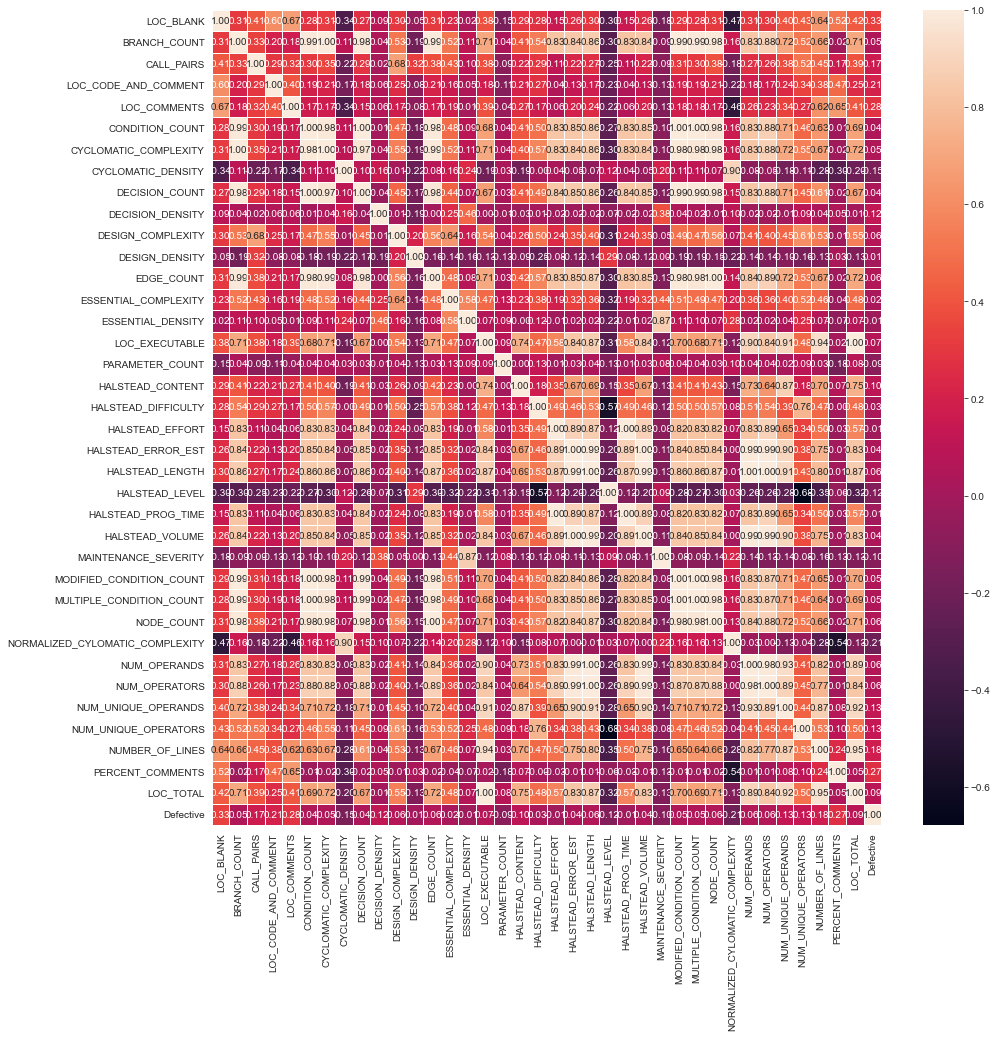

In [7]:
f,ax = plt.subplots(figsize = (15, 15))
sns.heatmap(df_data.corr(), annot = True, linewidths = .5, fmt = '.2f')
plt.show()

In [19]:
cor_matrix = df_data.corr('spearman').abs()

In [20]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                                 LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  \
LOC_BLANK                              NaN       0.42131    0.449987   
BRANCH_COUNT                           NaN           NaN    0.432739   
CALL_PAIRS                             NaN           NaN         NaN   
LOC_CODE_AND_COMMENT                   NaN           NaN         NaN   
LOC_COMMENTS                           NaN           NaN         NaN   
CONDITION_COUNT                        NaN           NaN         NaN   
CYCLOMATIC_COMPLEXITY                  NaN           NaN         NaN   
CYCLOMATIC_DENSITY                     NaN           NaN         NaN   
DECISION_COUNT                         NaN           NaN         NaN   
DECISION_DENSITY                       NaN           NaN         NaN   
DESIGN_COMPLEXITY                      NaN           NaN         NaN   
DESIGN_DENSITY                         NaN           NaN         NaN   
EDGE_COUNT                             NaN           NaN        

In [21]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
print(to_drop)

['LOC_COMMENTS', 'CONDITION_COUNT', 'CYCLOMATIC_COMPLEXITY', 'DECISION_COUNT', 'DESIGN_COMPLEXITY', 'EDGE_COUNT', 'ESSENTIAL_DENSITY', 'LOC_EXECUTABLE', 'HALSTEAD_CONTENT', 'HALSTEAD_DIFFICULTY', 'HALSTEAD_EFFORT', 'HALSTEAD_ERROR_EST', 'HALSTEAD_LENGTH', 'HALSTEAD_LEVEL', 'HALSTEAD_PROG_TIME', 'HALSTEAD_VOLUME', 'MAINTENANCE_SEVERITY', 'MODIFIED_CONDITION_COUNT', 'MULTIPLE_CONDITION_COUNT', 'NODE_COUNT', 'NORMALIZED_CYLOMATIC_COMPLEXITY', 'NUM_OPERANDS', 'NUM_OPERATORS', 'NUM_UNIQUE_OPERANDS', 'NUM_UNIQUE_OPERATORS', 'NUMBER_OF_LINES', 'PERCENT_COMMENTS', 'LOC_TOTAL']


In [22]:
df_data = df_data.drop(df_data[to_drop], axis=1)

In [23]:
df_data.shape

(1099, 10)

In [37]:
# Variance inflation factor analysis  (VIF) - setp 2

In [24]:
def vif(features):

    # Prepare a dataframe for VIF
    X_VIF = add_constant(features)

    # Simulate a multicollinearity situation of AddedLOC, A, and B
    #X_VIF['A'] = [2 * x_i + random.random() for x_i in X_VIF['AddedLOC']]
    #X_VIF['B'] = [3 * x_i + random.random() for x_i in X_VIF['AddedLOC']]

    # Calculate VIF scores
    vif_scores = pd.DataFrame([variance_inflation_factor(X_VIF.values, i) 
                   for i in range(X_VIF.shape[1])], 
                  index=X_VIF.columns)
    # Prepare a final dataframe of VIF scores
    vif_scores.reset_index(inplace = True)
    vif_scores.columns = ['Feature', 'VIFscore']
    vif_scores = vif_scores.loc[vif_scores['Feature'] != 'const', :]
    vif_scores = vif_scores.sort_values(by = ['VIFscore'], ascending = False)
    return vif_scores

In [25]:
X = df_data.iloc[:, 0:-1]
y = df_data["Defective"]

#y = df_data.pop('Defective')
#X = df_data

print("X:", X.shape)
print("y:", y.shape)

X: (1099, 9)
y: (1099,)


In [26]:
vif(X)

,Feature,VIFscore
1,LOC_BLANK,2.051666
3,CALL_PAIRS,1.888283
8,ESSENTIAL_COMPLEXITY,1.819878
4,LOC_CODE_AND_COMMENT,1.599347
2,BRANCH_COUNT,1.570224
7,DESIGN_DENSITY,1.416205
5,CYCLOMATIC_DENSITY,1.354644
6,DECISION_DENSITY,1.144573
9,PARAMETER_COUNT,1.092380


In [ ]:
#Drop Branch_Count

In [16]:
#X= X.drop(labels='BRANCH_COUNT',axis='columns')

In [42]:
X.columns

Index(['LOC_BLANK', 'CALL_PAIRS', 'LOC_CODE_AND_COMMENT', 'CONDITION_COUNT',
       'CYCLOMATIC_DENSITY', 'DESIGN_DENSITY', 'ESSENTIAL_COMPLEXITY',
       'PARAMETER_COUNT', 'MAINTENANCE_SEVERITY'],
      dtype='object')

In [ ]:
#resampling

Classes: [0, 1]
Counts: [961, 138]


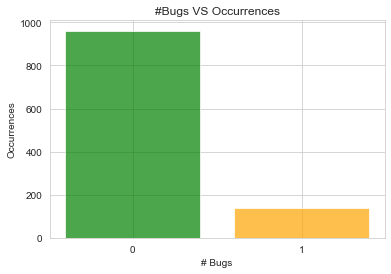

In [27]:
unique, counts = np.unique(y, return_counts=True)
print("Classes:", unique.tolist())
print("Counts:", counts.tolist())

plt.bar(unique, counts, color=['g', 'orange', 'r'], alpha=0.7)
plt.title("#Bugs VS Occurrences")
plt.xticks(range(len(unique)))
plt.ylabel("Occurrences")
plt.xlabel("# Bugs");

In [19]:
#oversampling using SMOTE up to 30%

In [28]:
from imblearn.over_sampling import SMOTE
X_train_over_sampled, y_train_over_sampled = SMOTE(sampling_strategy=0.3).fit_resample(X, y)
#X_cv_over_sampled, y_cv_over_sampled = SMOTE().fit_resample(X_cv, y_cv)
print("Train:", X_train_over_sampled.shape, y_train_over_sampled.shape)

Train: (1249, 9) (1249,)


Classes: [0, 1]
Counts: [961, 288]


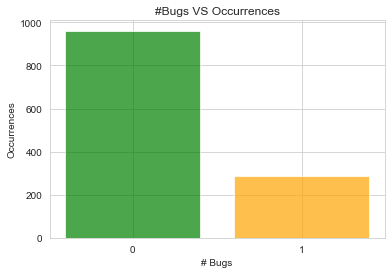

In [29]:
unique, counts = np.unique(y_train_over_sampled, return_counts=True)
print("Classes:", unique.tolist())
print("Counts:", counts.tolist())

plt.bar(unique, counts, color=['g', 'orange', 'r'], alpha=0.7)
plt.title("#Bugs VS Occurrences")
plt.xticks(range(len(unique)))
plt.ylabel("Occurrences")
plt.xlabel("# Bugs");

In [30]:
bugs= y_train_over_sampled.groupby(y_train_over_sampled)
bugs.size()

Defective
0    961
1    288
Name: Defective, dtype: int64

In [31]:
data = pd.concat([X_train_over_sampled, y_train_over_sampled], axis=1)

In [32]:
data

,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,CYCLOMATIC_DENSITY,DECISION_DENSITY,DESIGN_DENSITY,ESSENTIAL_COMPLEXITY,PARAMETER_COUNT,Defective
0,14.000000,11.000000,4.000000,3.000000,0.230000,2.000000,0.500000,1.000000,1.000000,0
1,6.000000,3.000000,1.000000,1.000000,0.500000,2.000000,1.000000,1.000000,1.000000,0
2,14.000000,19.000000,6.000000,5.000000,0.280000,2.400000,0.820000,3.000000,2.000000,0
3,20.000000,17.000000,2.000000,3.000000,0.260000,2.500000,0.300000,3.000000,5.000000,0
4,6.000000,3.000000,6.000000,1.000000,0.180000,2.000000,1.000000,1.000000,1.000000,1
...,...,...,...,...,...,...,...,...,...,...
1244,4.649251,11.805991,2.298502,1.947753,0.243657,2.000000,0.557983,1.000000,2.000000,1
1245,33.658468,31.244086,6.000000,7.316936,0.235610,2.399007,0.532195,6.097446,0.219489,1
1246,13.748595,36.005619,2.937149,0.377107,0.465028,2.000000,0.063771,1.000000,1.000000,1
1247,4.000000,16.130222,1.652334,0.217445,0.347383,2.434889,0.149140,2.087223,1.782555,1


In [77]:
# save the dataset for c5
filename = 'pc3.csv'
data.to_csv('data/cleaned/expr1/{}'.format(filename),sep=',')

In [ ]:
# Model Construction

In [35]:
validation_size = 0.3
random_seed=7

from sklearn.model_selection import train_test_split
X_train_over_sampled, X_test_over_sampled, y_train_over_sampled, y_test_over_sampled = train_test_split(X_train_over_sampled, y_train_over_sampled, test_size=0.3,random_state=7)
X_cv_over_sampled, X_test_over_sampled, y_cv_over_sampled, y_test_over_sampled = train_test_split(X_test_over_sampled, y_test_over_sampled, test_size=0.5)
print("Train:", X_train_over_sampled.shape, y_train_over_sampled.shape,
      "Test:", X_test_over_sampled.shape, y_test_over_sampled.shape,
      "Cross Validation", X_cv_over_sampled.shape, y_cv_over_sampled.shape)

Train: (874, 9) (874,) Test: (188, 9) (188,) Cross Validation (187, 9) (187,)


In [36]:
def Modeler(model, X_train, y_train, X_cv, y_cv, params, scale=False, n_jobs=True, pca=False):
    
    if scale & pca:
        pipeline = Pipeline([
            ('scale', StandardScaler()),
            ('dim_reduct', PCA(n_components=4)),
            ('clf', model())])
        print("Scaling and dim reduct...")
        
    elif scale:
        pipeline = Pipeline([ ('scale', StandardScaler()), ('clf', model())])
        
    elif pca:
        pipeline = Pipeline([
        ('dim_reduct', PCA(n_components=pca)),
        ('clf', model())])
    else:
        pipeline = Pipeline([('clf', model())])
        
    grid = GridSearchCV(pipeline, param_grid = params, cv=5, n_jobs=4, refit=True)
    grid.fit(X_cv, y_cv)
    
    best_prameters = {}
    for k, v in grid.best_params_.items():
        best_prameters[k[5:]] = v

    if n_jobs:
        model = model(**best_prameters, n_jobs=4)
    else:
        model = model(**best_prameters)
   
    model.fit(X_train, y_train)
    
    print("Best Parameters for model:", best_prameters)

    return {
        "model": model, 
        "best_params":best_prameters
    }

In [37]:
# metrics method
def metrics_calculate(model_name, y_val, y_pred):
    '''
    0. basic metrics values ['accuracy', 'precision', 'recall', 'fpr', 'fnr', 'auc']
    1. classification report
    2. confusion matrix
    '''
    y_val = np.reshape(y_val, -1).astype(np.int32)
    y_pred = np.where(np.reshape(y_pred, -1) > 0.5, 1, 0)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_val, y_pred,labels=[0,1]).ravel()
    fpr = fp / (tn + fp)
    fnr = fn / (tp + fn)
    auc = roc_auc_score(y_val, y_pred)
    print('Model:%s Acc:%.8f Prec:%.8f Recall:%.8f FNR:%.8f FPR:%.8f AUC:%.8f' % (model_name, accuracy, precision, recall, fnr, fpr, auc))
    print(model_name, 'classification report:\n', classification_report(y_val, y_pred))
    print(model_name, 'confusion_matrix:\n', confusion_matrix(y_val, y_pred))
    print('\n%s FNR:%.8f FPR:%.8f\n%s accuracy:%.8f' % (model_name, fnr, fpr, model_name, accuracy_score(y_pred,y_val)))

In [38]:
def model_eval(model, X_test, y_test, acc=True, recall_=True, auc_=True, plot_conf=True, plot_auc=True, f1=True, prop=False):
    
    res = [None, None, None, None] # Accuracy, auc_roc, f1_score, recall
    y_pred = model.predict(X_test)
    
    if prop:
        y_pred = np.where(y_pred > 0.5, 1, 0)
    
    if f1:
        f_sc = f1_score(y_test, y_pred, average='macro')
        res[2] = f_sc
        
    if acc:
        res[0] = accuracy_score(y_test, y_pred)
        print('accuracy:', res[0] * 100 ,'%')
              
    if recall_:
        res[3]= recall_score(y_test, y_pred, average='macro')
        print('recall:', res[3] * 100 ,'%')
              
    if auc_:
        lb = LabelBinarizer()
        lb.fit(y_test)

        truth = lb.transform(y_test)
        y_pred_encode = lb.transform(y_pred)
              
        res[1] = roc_auc_score(truth, y_pred_encode, average = 'macro')
        print('ROC:', res[1] * 100 ,'%')
              
    if plot_conf:
        fig, ax = plt.subplots(figsize=(10,6))

        conf = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
        sns.heatmap(conf, cmap= 'Set1', annot=True, cbar=False)
        plt.ylabel('Actual')
        plt.xlabel('Predicted')
        plt.title('Confusion Matrix');
    
    if plot_auc:
        fig, ax = plt.subplots(figsize=(10,6))

        if not auc_:
            lb = LabelBinarizer()
            lb.fit(y_test)

            truth = lb.transform(y_test)
            y_pred_encode = lb.transform(y_pred)

        fpr = [None, None, None]
        tpr = [None, None, None]
        auc_of_roc = [None, None, None]
        
        #n_classes = (0, 1)
        
        for i in range(0,1):
            fpr[i], tpr[i], _ = roc_curve(truth[:, i], y_pred_encode[:, i])
            auc_of_roc[i] = auc(fpr[i], tpr[i])
            
        plt.plot(fpr[0], tpr[0], label='0 - area under ROC = %0.3f' % auc_of_roc[0])

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title("ROC AUC");
        plt.legend()

    return res

In [39]:
scores = {}

In [78]:
# classifiers after removing multi-columuiray

In [79]:
#adaboost

In [40]:
# AdaBoostClassifier
ada_params = {
    'clf__learning_rate': [0.1, 0.5, 1.0],
    'clf__n_estimators': [100, 200]
}

ada = Modeler(AdaBoostClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, ada_params, scale=False, n_jobs=False)

Best Parameters for model: {'learning_rate': 1.0, 'n_estimators': 200}


accuracy: 79.7872340425532 %
recall: 69.50354609929079 %
ROC: 69.50354609929079 %


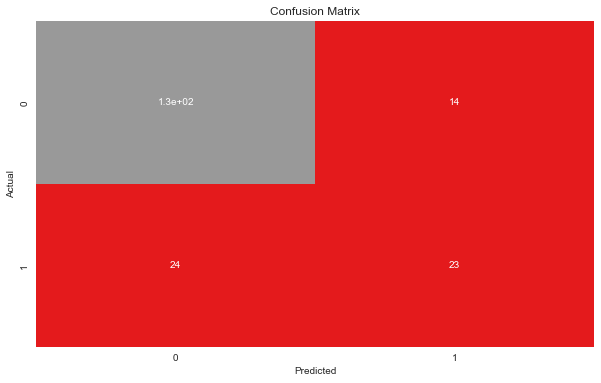

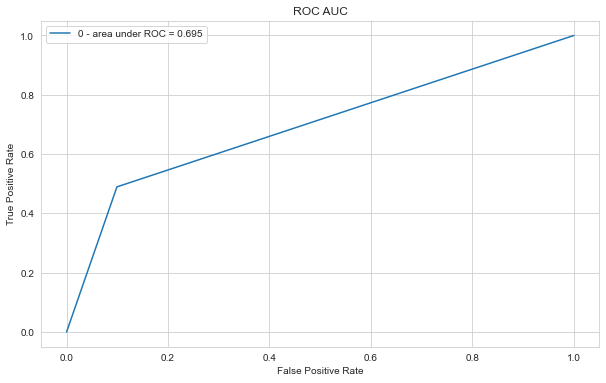

In [61]:
model_scoring = model_eval(ada["model"], X_test_over_sampled, y_test_over_sampled)
scores["AdaBoost Classifier | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                              "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                              "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                              "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

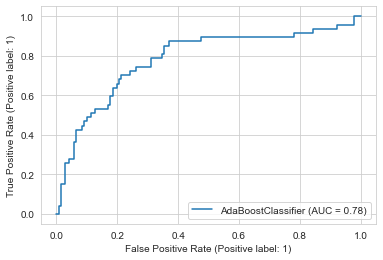

In [69]:
ROC_curve = plot_roc_curve(ada["model"], X_test_over_sampled, y_test_over_sampled)
scores["AdaBoost Classifier | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [ ]:
#xgboost

In [43]:
xg_params = {
    'clf__max_depth': [8, 9],
    'clf__learning_rate': [0.1],
    'clf__n_estimators':[200],
    'clf__reg_alpha':[1.1],
    'clf__colsample_bytree':[0.8],
    'clf__subsample':[0.8, 0.9,],
}

xgboost = Modeler(XGBClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, xg_params, scale=False, n_jobs=5)

[04:18:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:18:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best Parameters for model: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200, 'reg_alpha': 1.1, 'subsample': 0.8}


accuracy: 85.1063829787234 %
recall: 75.177304964539 %
ROC: 75.17730496453902 %


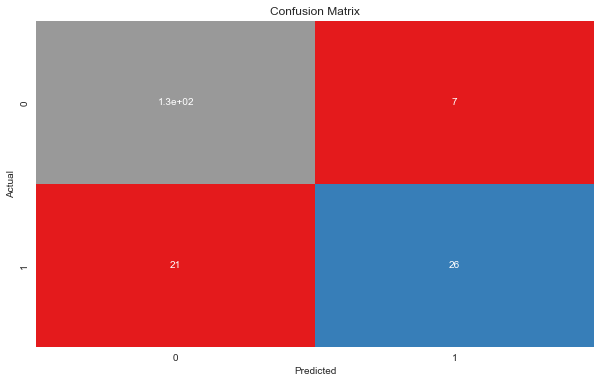

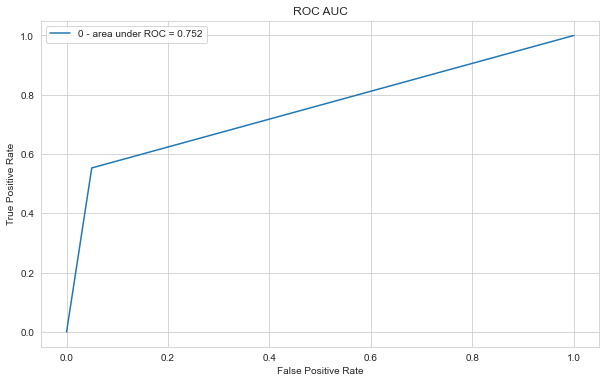

In [62]:
model_scoring = model_eval(xgboost["model"], X_test_over_sampled, y_test_over_sampled)
scores["XGBoost | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                              "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                              "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                              "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

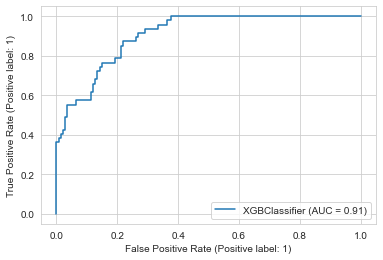

In [70]:
ROC_curve = plot_roc_curve(xgboost["model"], X_test_over_sampled, y_test_over_sampled)
scores["XGBoost | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [46]:
rfc_params = {
    'clf__n_estimators'      : [200, 500],
    'clf__max_depth'         : [10, 20],
    'clf__max_features': [1.0, 0.7, 0.4],
    'clf__criterion' :['gini', 'entropy']
}

rfc = Modeler(RandomForestClassifier, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, rfc_params, scale=False) 

Best Parameters for model: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 0.4, 'n_estimators': 500}


accuracy: 86.17021276595744 %
recall: 76.59574468085107 %
ROC: 76.59574468085107 %


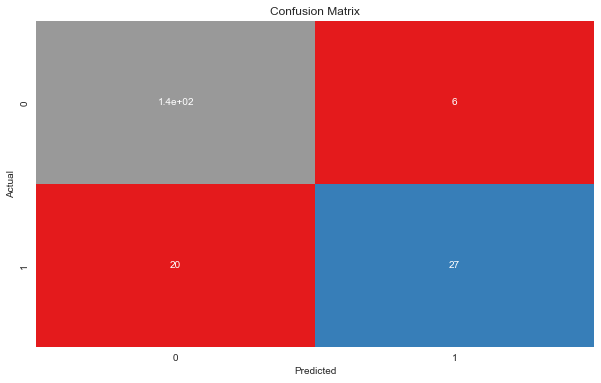

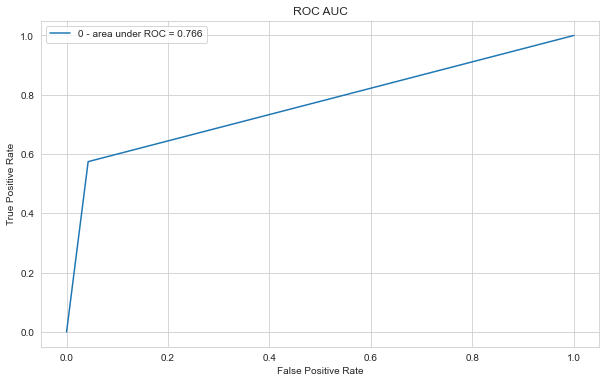

In [63]:
model_scoring = model_eval(rfc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Random Forest | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                              "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                              "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                              "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

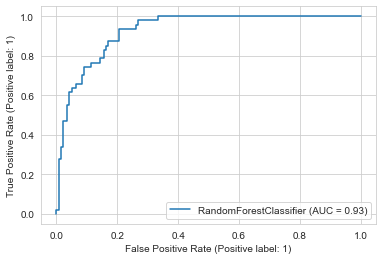

In [71]:
ROC_curve = plot_roc_curve(rfc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Random Forest | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [51]:
# SVC()
svc_params = {
    'clf__C': [0.1, 1],
    'clf__kernel': ['rbf'],
    'clf__gamma':[1, 0.01]
}

svc = Modeler(SVC, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled, svc_params, scale=False, n_jobs=False)

Best Parameters for model: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


accuracy: 81.91489361702128 %
recall: 64.53900709219857 %
ROC: 64.53900709219857 %


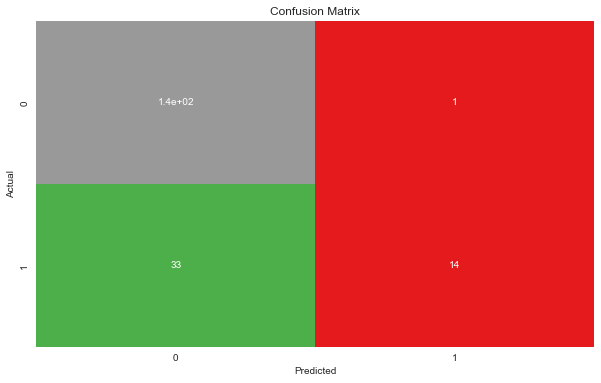

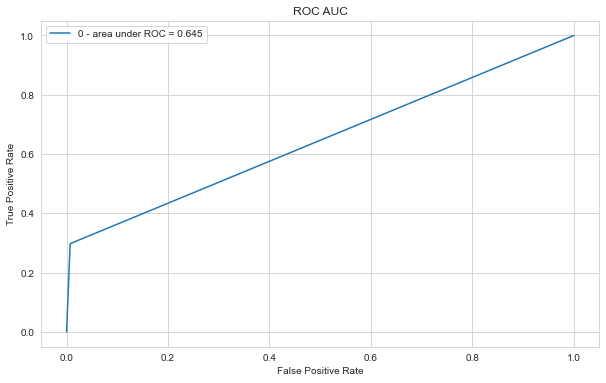

In [64]:
model_scoring = model_eval(svc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Support-Vector Machine | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                              "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                              "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                              "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

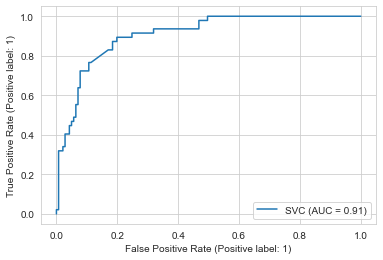

In [72]:
ROC_curve = plot_roc_curve(svc["model"], X_test_over_sampled, y_test_over_sampled)
scores["Support-Vector Machine | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [ ]:
# naive_bayes

In [54]:
naive_bayes = Modeler(GaussianNB, X_train_over_sampled, y_train_over_sampled, X_cv_over_sampled, y_cv_over_sampled,params={}, scale=False, n_jobs=False)

Best Parameters for model: {}


accuracy: 79.25531914893617 %
recall: 70.56737588652481 %
ROC: 70.56737588652481 %


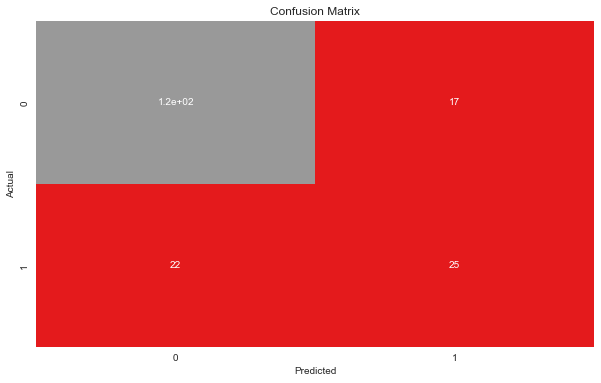

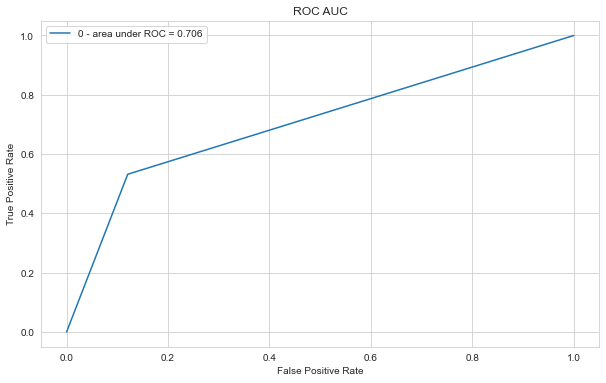

In [65]:
model_scoring = model_eval(naive_bayes["model"], X_test_over_sampled, y_test_over_sampled)
scores["Naive Bayes | Binary"] = {"Accuracy": '{0:.2f}'.format(round(model_scoring[0], 4)*100),
                              "ROC": '{0:.2f}'.format(round(model_scoring[1],4)*100),
                              "F1-Score": '{0:.2f}'.format(round(model_scoring[2],4)*100),
                              "Recall-Score": '{0:.2f}'.format(round(model_scoring[3],4)*100)}

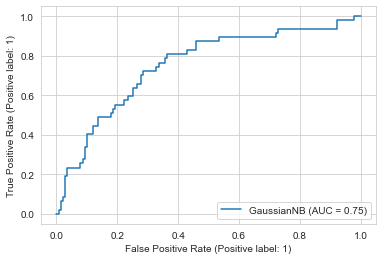

In [73]:
ROC_curve = plot_roc_curve(naive_bayes["model"], X_cv_over_sampled, y_cv_over_sampled)
scores["Naive Bayes | Binary"]["AUC"] = '{0:.2f}'.format(round(ROC_curve.roc_auc,4)*100)

In [43]:
# Model Evaluation Comparision '%'

In [75]:
score_df = pd.DataFrame.from_dict(scores).T
score_df= score_df.sort_values('AUC', ascending=False)

In [76]:
score_df

,Accuracy,ROC,F1-Score,Recall-Score,AUC
Random Forest | Binary,86.17,76.60,79.36,76.60,92.82
Support-Vector Machine | Binary,81.91,64.54,67.17,64.54,90.66
XGBoost | Binary,85.11,75.18,77.77,75.18,90.64
AdaBoost Classifier | Binary,79.79,69.50,70.87,69.50,78.20
Naive Bayes | Binary,79.26,70.57,71.30,70.57,75.14
